# Imports and Configurations

In [ ]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm

import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
sns.set_style()

In [ ]:
%matplotlib inline

# Data

In [ ]:
data = pd.read_csv("./drive/MyDrive/Data/MutualFunds_Cleaned.csv",parse_dates=True)

In [ ]:
data.head()

,fund_symbol,inception_date,fund_net_annual_expense_ratio,fund_yield,fund_return_3years,fund_r_squared_3years,fund_standard_deviation_3years,fund_sharpe_ratio_3years,fund_treynor_ratio_3years,fund_alpha_3years,fund_beta_3years,fund_mean_annual_return_3years,rating,risk_rating,return_rating,investment_type,size_type,median_market_cap,net_asset_value,fund_return_ytd
0,AAAAX,2007-07-29,1.22,1.22,3.03,85.80,12.46,0.18,1.32,-2.51,1.09,0.31,3.0,3.0,3.0,Blend,Large,18592.11,6.979100e+08,-7.60
1,AAADX,2011-12-29,1.43,2.80,9.71,87.23,8.46,0.93,6.82,0.17,1.17,0.80,4.0,5.0,5.0,Blend,Large,168478.91,8.938000e+07,0.30
2,AAAGX,1999-10-28,1.12,0.00,19.44,90.82,19.81,0.92,16.87,7.68,1.06,1.65,3.0,4.0,3.0,Growth,Large,340488.16,1.490000e+09,24.20
3,AAAIX,2000-07-31,0.63,1.77,6.79,98.48,14.93,0.41,3.70,0.07,1.41,0.64,4.0,3.0,4.0,Blend,Large,29418.97,7.072500e+08,3.17
4,AAANX,2012-01-30,1.45,0.69,3.04,95.21,18.26,0.17,0.86,-4.19,1.69,0.39,3.0,5.0,4.0,Blend,Large,56230.30,4.955100e+08,-3.26


# Data Exploration

In [ ]:
data2 = data.copy()

## Distribution of Each Variable

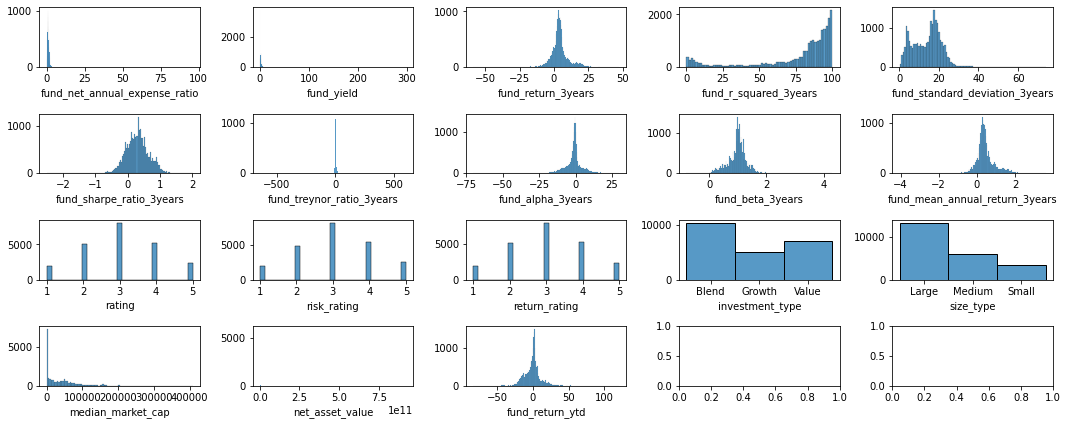

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize = (15,6))

columns = data.drop(['fund_symbol','inception_date'],axis=1).columns

for col, ax in zip(columns,axes.flatten()):
  hist = sns.histplot(x = data[col],ax=ax)
  hist.set(ylabel=None)

plt.tight_layout()
plt.show()

## Plotting variables relationship with Returns

In [ ]:
# Fund_return_3years, Fund_mean_annual_return_3years, Fund_yield

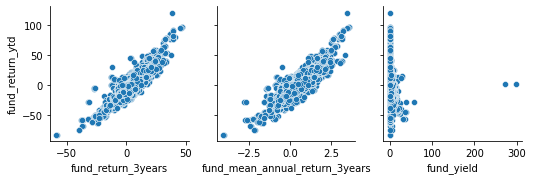

In [ ]:
sns.pairplot(data2,x_vars = ['fund_return_3years','fund_mean_annual_return_3years','fund_yield'],y_vars = ['fund_return_ytd'])
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


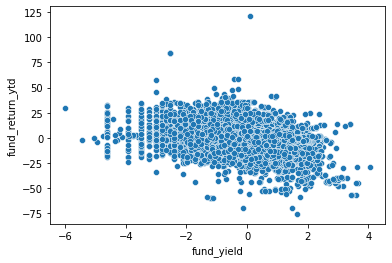

In [ ]:
data2 = data2[data2['fund_yield'] < 75]
sns.scatterplot(x= np.log(data2.fund_yield),y=data2.fund_return_ytd)
plt.show()

In [ ]:
# Fund_r_squared_3years,Fund_standard_deviation_3years

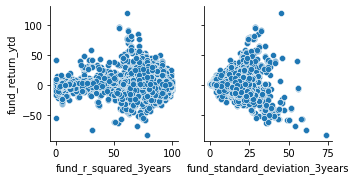

In [ ]:
sns.pairplot(data2, x_vars = ['fund_r_squared_3years','fund_standard_deviation_3years'], y_vars = 'fund_return_ytd' ,kind='scatter')
plt.show()

Note: standard deviation appears to be heteroskedatic. 

In [ ]:
# Fund_sharpe_ratio_3years, Fund_treynor_ratio_3years

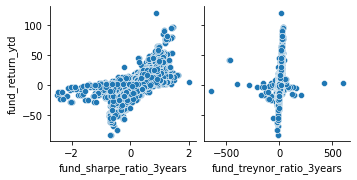

In [ ]:
sns.pairplot(data2, x_vars= ['fund_sharpe_ratio_3years', 'fund_treynor_ratio_3years'],
       y_vars = 'fund_return_ytd',kind='scatter')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


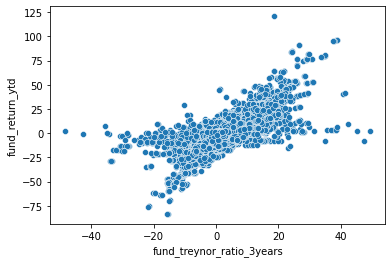

In [ ]:
data2 = data2[np.abs(data['fund_treynor_ratio_3years']) < 50]
sns.scatterplot(x= data3.fund_treynor_ratio_3years,y=data2.fund_return_ytd)
plt.show()

In [ ]:
# Fund_alpha_3years, Fund_beta_3years

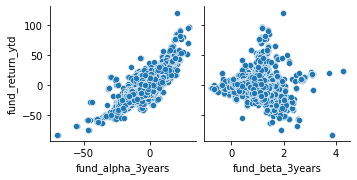

In [ ]:
sns.pairplot(data2, x_vars = ['fund_alpha_3years', 'fund_beta_3years'], y_vars = 'fund_return_ytd',kind='scatter')
plt.show()

Note: The beta displays clear heterorskasticity

In [ ]:
# Rating, Risk rating, and Return rating

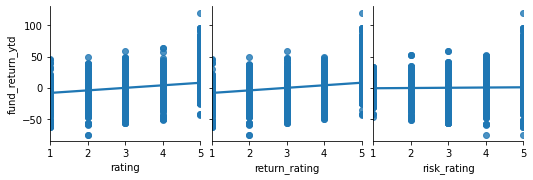

In [ ]:
sns.pairplot(data2, x_vars = ['rating', 'return_rating','risk_rating'], y_vars = 'fund_return_ytd',kind='reg')
plt.show()

In [ ]:
# Size and Investment type

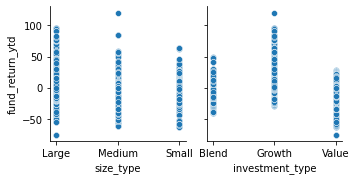

In [ ]:
sns.pairplot(data2, x_vars = ['size_type', 'investment_type'], y_vars = 'fund_return_ytd')
plt.show()

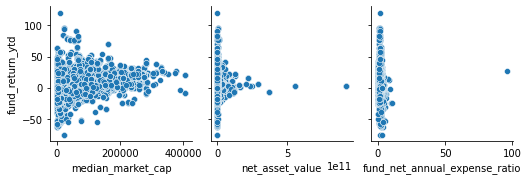

In [ ]:
# Market Cap, Net Annual Expense Ratio and Net Asset Value 

sns.pairplot(data2, x_vars = ['median_market_cap', 'net_asset_value','fund_net_annual_expense_ratio'], y_vars = 'fund_return_ytd')
plt.show()

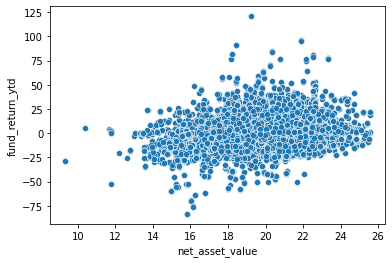

In [ ]:
data2 = data2[data2['net_asset_value'] < 1.5 * (10 ** 11)]
sns.scatterplot(x = np.log(data2.net_asset_value), y = data2.fund_return_ytd)

## Look at correlations between variables

In [ ]:
data2.fund_yield = np.log(data2.fund_yield).replace{}
data2.net_asset_value = np.log(data2.net_asset_value) 

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Pairs with abs(correlation) > .6

high_corr_df = data2.corr()[np.abs(data2.corr()) > .6].replace({1:np.nan}).dropna(how='all').dropna(how='all',axis=1)

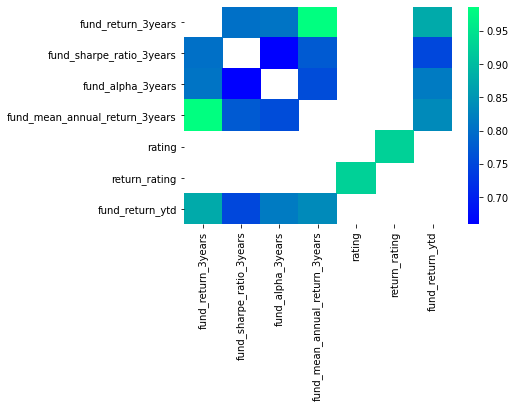

In [ ]:
sns.heatmap(high_corr_df, mask = mask, cmap=plt.get_cmap('winter'))

Observations: 

- Response is only highly correlated with 3 year total and mean returns, and 3 year sharpe and alpha statistics

- Response is more correlated with total than mean returns 

- Return_rating and rating are highly correlated

- Have to to choose between alpha and sharpe ratio

In [ ]:
data2.drop('fund_return_ytd',axis=1).corrwith(data2.fund_return_ytd).sort_values(ascending=False)

fund_return_3years                0.877241
fund_mean_annual_return_3years    0.836607
fund_alpha_3years                 0.817584
fund_sharpe_ratio_3years          0.750771
fund_treynor_ratio_3years         0.421426
return_rating                     0.360765
rating                            0.358136
median_market_cap                 0.252121
net_asset_value                   0.208992
risk_rating                       0.033071
fund_r_squared_3years            -0.031994
fund_net_annual_expense_ratio    -0.061237
fund_beta_3years                 -0.090438
fund_standard_deviation_3years   -0.174630
fund_yield                             NaN
dtype: float64

# Data Preprocessing 

## Remove outliers

In [ ]:
# Naively remove distinct outliers from plotting section 

data = data[data['fund_yield'] < 75]
data = data[data['fund_standard_deviation_3years'] < 60]
data = data[np.abs(data['fund_treynor_ratio_3years']) < 50]
data = data[data['fund_beta_3years'] < 3] 
data = data[data['fund_alpha_3years'] > -50]
data = data[data['net_asset_value'] < 1.5 * (10 ** 11)]
data = data[data['fund_net_annual_expense_ratio'] < 7] 

## Deal with heteroskedasticity

In [ ]:
data['net_asset_value_log'] = np.log(data.net_asset_value.replace(0,1))
data['fund_yield_log'] = np.log(data.fund_yield.replace(0,1))

## Encode categorical variables

In [ ]:
# Size and Investment Type # 

In [ ]:
data[['size_type','investment_type']].value_counts()

size_type  investment_type
Large      Blend              7113
           Value              3415
           Growth             2559
Medium     Blend              2295
           Value              1996
           Growth             1647
Small      Value              1631
           Blend               972
           Growth              888
dtype: int64

In [ ]:
data.size_type = data.size_type.replace({"Large":3,"Medium":2,"Small":1}) # Change size to ordinal variable

In [ ]:
dummies = pd.get_dummies(data.investment_type) # Change investment to dummy since distance has no meaning
data = data.join(dummies)

In [ ]:
data.loc[:2,['investment_type','Blend','Growth','Value']]

,investment_type,Blend,Growth,Value
0,Blend,1,0,0
1,Blend,1,0,0
2,Growth,0,1,0


## Final Selection of Features

In [ ]:
# Drop descriptors and variables that would cause multi-collinearity/heterskedasticity
# Drop Blend, to use as the reference group for investment type dummy

X_df = data.drop(['fund_symbol','fund_return_ytd','return_rating','fund_sharpe_ratio_3years','fund_mean_annual_return_3years','Blend','fund_beta_3years',
                  'fund_standard_deviation_3years','net_asset_value',
                  'fund_yield','investment_type','inception_date'],axis=1)
y = data.fund_return_ytd

## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_stand = scaler.fit_transform(X_df.values)

X_stand_df = pd.DataFrame(X_stand, columns=X_df.columns)
X_stand_df.index = y.index

# Model Fitting (Inference)

## Fit initial model 

In [ ]:
X = sm.add_constant(X_stand_df)

mod = sm.OLS(y, X)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        fund_return_ytd   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     8299.
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:23:44   Log-Likelihood:                -69013.
No. Observations:               22516   AIC:                         1.381e+05
Df Residuals:                   22502   BIC:                         1.382e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Simple Backwards Elimination

In [ ]:
pmax=1

cols = list(X)

while (len(cols)>0):
    p = []
    X_temp = X[cols]
    model = sm.OLS(y, X_temp).fit()
    p = model.pvalues
    pmax = max(p)
    
    if (pmax>0.05):
        cols = list(p.drop(p[p==pmax].index).index)
        
    else:
        break

In [ ]:
# Fit 

X2 = X[cols]

mod = sm.OLS(y, X2)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        fund_return_ytd   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     8991.
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:31:03   Log-Likelihood:                -69013.
No. Observations:               22516   AIC:                         1.381e+05
Df Residuals:                   22503   BIC:                         1.382e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Fit model with interactions 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_obj = PolynomialFeatures()
X_poly = poly_obj.fit_transform(X2)
mod = sm.OLS(y, X_poly)
res = mod.fit()
print(res.rsquared)

0.8631495566539132
